# Tensorflow Multi-Layer Perceptron

#### built-in dataset: MNIST

In [1]:
import tensorflow as tf

/Users/pantelistzamalis/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### importing MNIST dataset:

In [2]:
from tensorflow.examples.tutorials.mnist import input_dataput_data

In [4]:
mnist = input_data.read_data_sets('/tmp/mnist-data', one_hot=True)

Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/mnist-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/mnist-data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/mnist-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/mnist-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


#### checking the type of mnist:

In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

 it is a Tensoflow object!

#### grabbing the images (all the arrays):

In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
type(mnist.train.images)

numpy.ndarray

In [8]:
mnist.train.images.shape

(55000, 784)

55000 images and each image is an array of 784

#### grabbing an image (an array):

In [9]:
mnist.train.images[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [10]:
mnist.train.images[2].shape

(784,)

It is a vector!

To see the image and visualize the data how it looks like a reshaping of that array must take place, i.e. reshaping to 28x28, because: 28 * 28 = 784

In [11]:
mnist.train.images[2].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

The values are from 0 to 1, which represents the darkeness of the pixels in that array.

#### visualizing the image:

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [14]:
sample_image = mnist.train.images[2].reshape(28, 28)

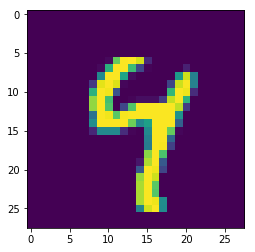

In [15]:
plt.imshow(sample_image)

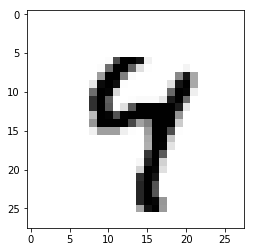

In [17]:
plt.imshow(sample_image, cmap='Greys')

In [22]:
sample_image2 = mnist.train.images[190].reshape(28, 28)

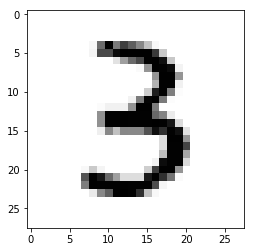

In [23]:
plt.imshow(sample_image2, cmap='Greys')

#### defining parameters for using them later on the multi-layer perceptron model:

In [24]:
# how quickly the cost function is adjusted, i.e. how quickly do you want to apply that optimization function
learning_rate = 0.001

# the training cycles
training_epochs = 15

# the size of the batches of the training data
batch_size = 100

In [25]:
# network parameters that define how will the neural network look like (i.e. this multi-layer perceptron)
# the lower the rate the higher the possibility for accurate training results, but that comes at the cost 
# of having to wait as far as physical time for the results.

# number of classes: here 10, because the classes are the numbers between 0 to 9
n_classes = 10

# number of samples: it is 55000 or it can defined as follows
n_samples = mnist.train.num_examples

In [28]:
n_input = 784

In [29]:
# number of neurons in the two hidden layers that will be used
n_hidden_1 = 256  # 256, because that's the way computers store image information (8-bit color storage)
n_hidden_2 = 256

### Deep Learning process
1) receiving the input data array (of 784) and sending it to the first hidden layer of 256 neurons

2) the data will begin to have a weight attached to it between the layers

3) a bias is also added along with that

4) then it continues to the next hidden layer until it reaches the final output layer (the more the hidden layer, the more the model will take to run, but with more hidden layers there is a possibility of being more accurate on the training data --> trade-off)

5) a loss function (or cost function) is used to see how far from the original data the output (or the desired results) is --> evaluation --> that's where the reinforcement process comes in

6) applying an optimization function to minimum the loss, or reducing the error (this is done by adjusting the weight values accordinly accross the entire network) --> using an Optimizer: Adam optimizer

#### creating a function for multi-layer perceptron:

In [44]:
# starting with two hidden layers using also the RELU activation function --> returns X or 0
def multilayer_perceptron(x, weights, biases):
    """
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: Dict of bias values
    """
    # 1st hidden layer with RELU Activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # x --> data input
    # matmul() --> matrix multiplication --> h1: the first set of weights (it will be set up later on)
    # add() --> adding a bias
    # From theory of neural networks: X * weight + bias --> or else --> X * W + B
    
    # RELU(X * W + B) --> f(x) = max(0, x)
    layer_1 = tf.nn.relu(layer_1)
    
    # 2nd hidden layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    output_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return output_layer

RELU: https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

RELU: https://medium.com/tinymind/a-practical-guide-to-relu-b83ca804f1f7

Essentially Tensorflow has what's known as a graph object that can become aware of the states of all the variables. A variable is a modifiable tensor that lives in tensorflow's graph of interacting operations. It can be used and even modified by the computation, as well as it will generally have the model parameters be variables.

#### creating weights dictionary:

In [45]:
# tf.random_normal: outputs random values from a normal distribution
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [46]:
weights

{'h1': <tf.Variable 'Variable_14:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_15:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_16:0' shape=(256, 10) dtype=float32_ref>}

The output of the neural network will look like the array below:

[0 0 0 0 0 0 1 0 0 0]

 0 - 9 (10 numbers) --> Where the index of the array has the value of 1, that means that the output is that number. The above example indicates the number 6.

#### creating biases dictionary:

In [47]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

#### creating placeholder for input x and output y:

In [48]:
x = tf.placeholder('float', [None, n_input])  # 1st argument: data type, 2nd argument: shape

In [49]:
y = tf.placeholder('float', [None, n_classes])

#### constructing the model:

In [50]:
pred = multilayer_perceptron(x=x, weights=weights, biases=biases)

#### defining cost and optimization functions:

In [53]:
# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred))

In [54]:
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

## Training the model:

#### Another convenient function is *next_batch*:

Taking a sample batch of 10:

In [55]:
mnist.train.next_batch(10)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]]))

It returns a tuple of ten samples.

In [56]:
len(mnist.train.next_batch(10))

2

In [57]:
len(mnist.train.next_batch(10)[0])

10

In [58]:
len(mnist.train.next_batch(10)[1])

10

This is just a banch of 10 samples of the actual training data: meaning that 784 are 28^2.

the first item is a 784 long array and the second is the actual sample.

In [59]:
t = mnist.train.next_batch(10)

In [60]:
Xsample, ysample = t

In [61]:
Xsample

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
ysample

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

Taking a ssample batch of 1:

In [65]:
t1 = mnist.train.next_batch(1)

In [66]:
Xsample1, ysample1 = t1

In [67]:
Xsample1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [70]:
Xsample1.reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [71]:
ysample1

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

Here, the ysample1 indicates the number 7

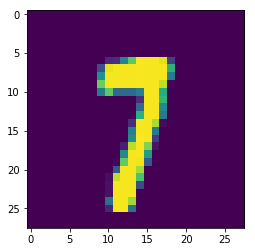

In [73]:
plt.imshow(Xsample1.reshape(28, 28))

It is actually the number 7!

### Running the session:

#### Opening the session:

In [74]:
sess = tf.InteractiveSession()

#### Initializing the variables:

In [75]:
# old method
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [76]:
# new method
init = tf.global_variables_initializer()

#### Running the session:

In [78]:
sess.run(init)

#### Training the model:

In [81]:
import time
start_time = time.time()

# 15 loops
for epoch in range(training_epochs):
    
    # Cost (purpose is to minimize the cost)
    avg_cost = 0.0
    
    # Converting the total number of batches to an integer
    total_batch = int(n_samples/batch_size)  # 50000 samples / 100 samples for each batch size
    
    # now,  for every batch of data of the total batches I grab the next batch of training data and the labels
    # using the next_batch() function
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)  # batch size = 100
        
        # using the feed dictionary for the optimization and cost value
        # using _,x in a tuple, means that the first item doesn't need a value
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        # the above returns the loss (c) value
        avg_cost += c / total_batch
        
    print('Epoch: {} | Cost: {:.4f}'.format(epoch+1, avg_cost))
    
print('Model has completed {} Epochs of training'.format(training_epochs))

end_time = time.time()
print('Time elapsed:', end_time - start_time)

Epoch: 1 | Cost: 0.5510
Epoch: 2 | Cost: 0.4681
Epoch: 3 | Cost: 0.4416
Epoch: 4 | Cost: 0.4460
Epoch: 5 | Cost: 0.3724
Epoch: 6 | Cost: 0.3205
Epoch: 7 | Cost: 0.3383
Epoch: 8 | Cost: 0.2875
Epoch: 9 | Cost: 0.3002
Epoch: 10 | Cost: 0.2442
Epoch: 11 | Cost: 0.2464
Epoch: 12 | Cost: 0.1970
Epoch: 13 | Cost: 0.2645
Epoch: 14 | Cost: 0.3125
Epoch: 15 | Cost: 0.2064
Model has completed 15 Epochs of training
Time elapsed: 23.234797716140747


### Evaluating the model

Tensorflow comes with built-in function for evaluating the model, such as tf.equal(), tf.cast(), tf.reduce_mean()

#### tf.equal() (checking how many predictions are equal to the test) --> Returns the truth value of (x == y) element-wise:

argmax: https://www.tensorflow.org/api_docs/python/tf/math/argmax

In [83]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

**argmax:** Find the argmax which is equal to 1, because the output is an array of zeros and one indexed from 0 to 9 array positions ([0 0 0 0 0 1 0 0 0 0]) --> *check ysample1 variable*

In [84]:
print(correct_predictions)

Tensor("Equal_1:0", shape=(?,), dtype=bool)


In [85]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


#### tf.cast():
To get the actual numerical value for predictions, the *tf.cast()* has to be used to cast the Tensor booleans to float point values in order to take the average of it. To take the average, a conversion of Trues to ones.

In [86]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [87]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


#### tf.reduce_mean() -->  grabbing the mean of the elements across the Tensor:

In [88]:
accuracy = tf.reduce_mean(correct_predictions)

In [89]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

#### calling the MNIST test labels and images (actual values) to evaluate the accuracy:

In [90]:
# seeing on label example
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [91]:
mnist.test.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### evaluating:

In [94]:
model_accuracy = accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

In [95]:
print('Model Accuracy:', model_accuracy)

Model Accuracy: 0.9569


Very good results. However, training with more epochs (such as 10000 cycles), a better accuracy can be produced!